In [38]:
import numpy as np
import scipy as sp
import scipy.special
import scipy.integrate
import matplotlib.pyplot as plt

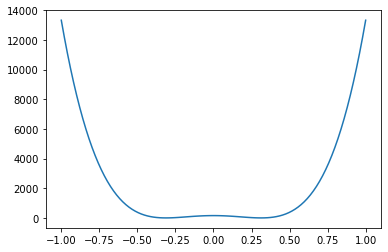

In [37]:
def f(x):
    return ((16 * x)**2 - 25)**2 / 4

xvec = np.linspace(-1, 1, 100)
ftru = f(xvec)
plt.plot(xvec, ftru)
plt.show()

In [51]:
n = 10

def theta(k):
    return (k - 0.5) * np.pi / (n + 1)

def g(k):
    return f(np.cos(theta(k)))

kvec = np.arange(1, n + 2)
print(kvec)
nvec = np.arange(0, n + 1)
print(nvec)

cvec = 2 / (n + 1) * np.sum(g(kvec) * np.cos(nvec[..., np.newaxis] * theta(kvec)), axis=1)

print(cvec.shape)
print(cvec)

[ 1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10]
(11,)
[ 9.40050000e+03  2.97652811e-12  6.59200000e+03 -3.30725346e-13
  2.04800000e+03  3.63797881e-12  2.64580277e-12 -1.15753871e-12
  6.61450692e-13  2.48044010e-13 -1.28156072e-12]


In [52]:
npcvec = np.polynomial.chebyshev.chebinterpolate(f, n)
print(npcvec.shape)
print(npcvec)

(11,)
[ 4.70025000e+03  1.83143593e-13  6.59200000e+03  6.96858175e-14
  2.04800000e+03  7.99710796e-14 -4.33331861e-12 -1.70719555e-13
 -7.06342492e-12 -3.16105829e-14 -9.92411991e-12]


(11,)
(100,)


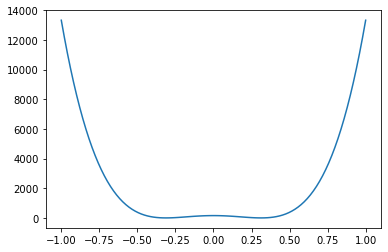

In [53]:
T = sp.special.eval_chebyt(nvec, xvec[0])
print(T.shape)

def cheb2x(x):
    rtn = np.zeros_like(x)
    for i in range(len(x)):
        chebvec = sp.special.eval_chebyt(nvec, x[i])
        chebvec[0] = chebvec[0] * 0.5
        chebvec[-1] = chebvec[-1] * 0.5
        rtn[i] = cvec @ chebvec
    return rtn

print(cheb2x(xvec).shape)

plt.plot(xvec, cheb2x(xvec))
plt.show()

In [54]:
def intgrd(x):
    chebvec = sp.special.eval_chebyt(nvec, x)
    chebvec[0] = chebvec[0] * 0.5
    chebvec[-1] = chebvec[-1] * 0.5
    fhat = cvec @ chebvec
    return (fhat - f(x))**2

print(np.sqrt(sp.integrate.quad(intgrd, -1, 1, )[0]))

6.520717126961434e-12


Error(n=2): 3891.2933990461734
Error(n=3): 2031.6810148327281
Error(n=4): 1015.8405074163647
Error(n=5): 4.755626284195473e-12
Error(n=6): 1.0059977560391877e-11
Error(n=7): 1.3287073640685684e-11
Error(n=8): 8.113402163560021e-12
Error(n=9): 4.6501444045703925e-12
Error(n=10): 6.520717126961434e-12
Error(n=11): 1.0600955638788583e-11
Error(n=12): 1.1961373567677085e-11
Error(n=13): 1.3085989106721335e-11
Error(n=14): 1.336329910231977e-11
Error(n=15): 1.1182081687146142e-11
Error(n=16): 1.0480147071144888e-11
Error(n=17): 1.3090869493403066e-11
Error(n=18): 1.638476496218078e-11
Error(n=19): 6.1259977838430364e-12
Error(n=20): 2.06623114438946e-11


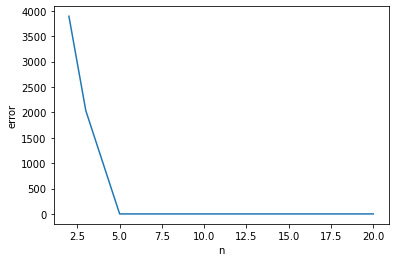

In [61]:
def errintgrd(x, nn):
    def ttheta(k):
        return (k - 0.5) * np.pi / (nn + 1)

    def gg(k):
        return f(np.cos(ttheta(k)))

    kkvec = np.arange(1, nn + 2)
    nnvec = np.arange(0, nn + 1)
    ccvec = 2 / (nn + 1) * np.sum(gg(kkvec) * np.cos(nnvec[..., np.newaxis] * ttheta(kkvec)), axis=1)

    chebsvec = sp.special.eval_chebyt(nnvec, x)
    chebsvec[0] = chebsvec[0] * 0.5
    chebsvec[-1] = chebsvec[-1] * 0.5

    ffhat = ccvec @ chebsvec
    return (ffhat - f(x))**2

error = []

for thisn in range(2, 20 + 1):
    thiserror = np.sqrt(sp.integrate.quad(errintgrd, -1, 1, args=(thisn))[0])
    print(f'Error(n={thisn}):', thiserror)
    error.append(thiserror)

plt.plot(range(2, 20 + 1), error)
plt.xlabel('n')
plt.ylabel('error')
plt.show()